# Access the file from Google Colab through the link bellow
https://colab.research.google.com/drive/18TzVysKw7-cc6JgWFg9opD0OlKCo_gsS?usp=sharing


# Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Listing files in the target directory to confirm the location of the dataset


In [ ]:
!ls /content/drive/MyDrive/'Colab Notebooks'


 Code		     'FR Model.ipynb'   piAiModel.ipynb   Untitled	    week7_assignment.ipynb
 custom_model.ipynb   iris.csv	        python.ipynb	  Untitled0.ipynb


# Loading and Exploring the Dataset

In [ ]:
import pandas as pd

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/iris.csv' # Adjust according to your dataset location

try:
    iris = pd.read_csv(file_path)  # Load the dataset
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(iris.head())

# Check the structure of the dataset
print("\nDataset info:")
print(iris.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(iris.isnull().sum())

# Clean the dataset by dropping missing values (if any)
iris_cleaned = iris.dropna()
print("\nDataset after dropping missing values:")
print(iris_cleaned.info())


Dataset loaded successfully!

First 5 rows of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values in the dataset:
sepal.length    0
sepal.width     0
petal.length

# Basic Data Analysis

In [ ]:
# Compute basic statistics of numerical columns
print("\nBasic statistics of the dataset:")
print(iris_cleaned.describe())

# Perform groupings on the variety column and compute the mean of numerical columns
print("\nMean of numerical columns grouped by variety:")
grouped_means = iris_cleaned.groupby('variety').mean()
print(grouped_means)

# Identify any patterns or findings
print("\n Findings:")
print("Petal length and petal width vary significantly across different varieties.")



Basic statistics of the dataset:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Mean of numerical columns grouped by variety:
            sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026

 Findings:
Petal length and petal width vary signific

# Importing Visualization Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")


## Line Chart

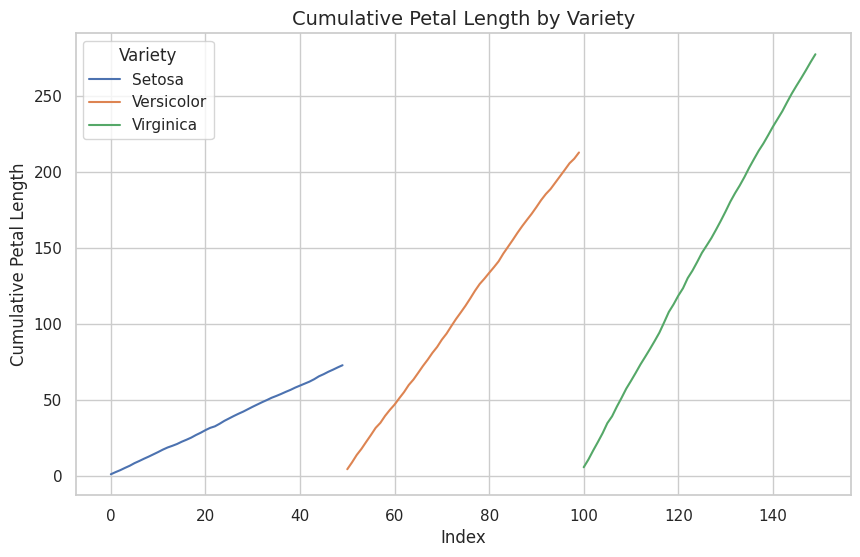

In [ ]:
# Create a cumulative sum of petal lengths for each variety
iris_cleaned['cumulative_petal_length'] = iris_cleaned.groupby('variety')['petal.length'].cumsum()

# Line chart showing the cumulative petal length for each variety
plt.figure(figsize=(10, 6))
for variety, group_data in iris_cleaned.groupby('variety'):
    plt.plot(group_data.index, group_data['cumulative_petal_length'], label=variety)

plt.title('Cumulative Petal Length by Variety', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Cumulative Petal Length', fontsize=12)
plt.legend(title='Variety')
plt.show()


## Bar Chart

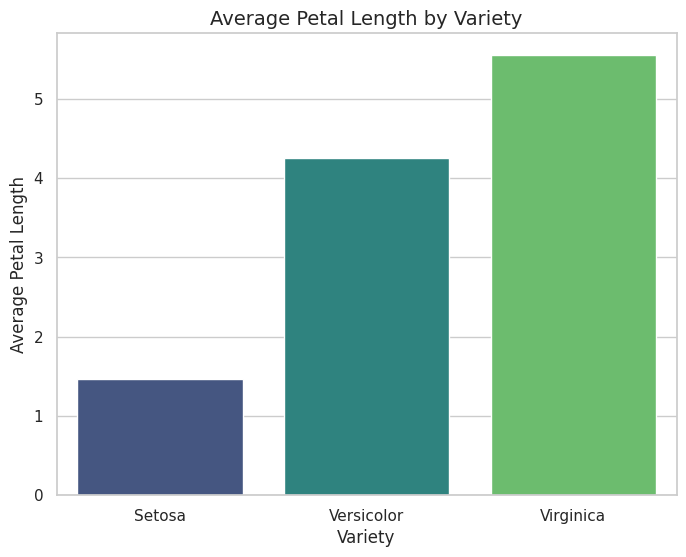

In [26]:
# Bar chart comparing average petal length across varieties
plt.figure(figsize=(8, 6))

# Explicitly assign `hue` to `x` and disable the legend
sns.barplot(
    x='variety', y='petal.length',
    data=iris_cleaned,
    errorbar=None,
    palette='viridis',
    hue='variety',
    dodge=False,
    legend=False
)

plt.title('Average Petal Length by Variety', fontsize=14)
plt.xlabel('Variety', fontsize=12)
plt.ylabel('Average Petal Length', fontsize=12)
plt.show()


## Histogram

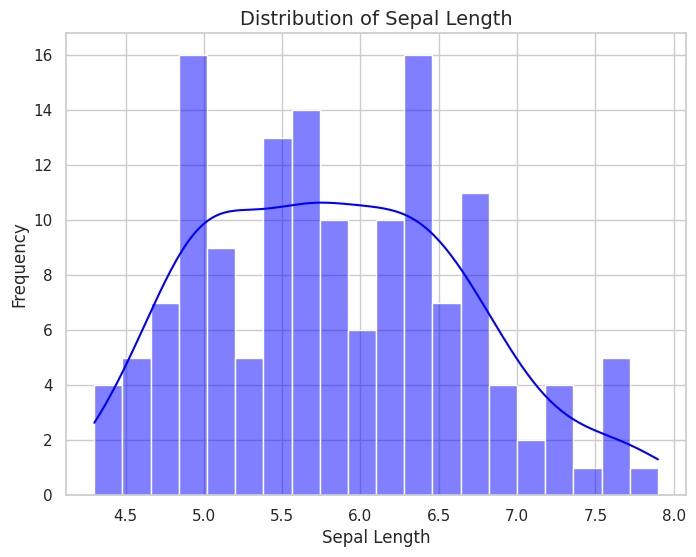

In [27]:
# Histogram of sepal length to understand its distribution
plt.figure(figsize=(8, 6))
sns.histplot(iris_cleaned['sepal.length'], kde=True, bins=20, color='blue')

plt.title('Distribution of Sepal Length', fontsize=14)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


## Scatter Plot

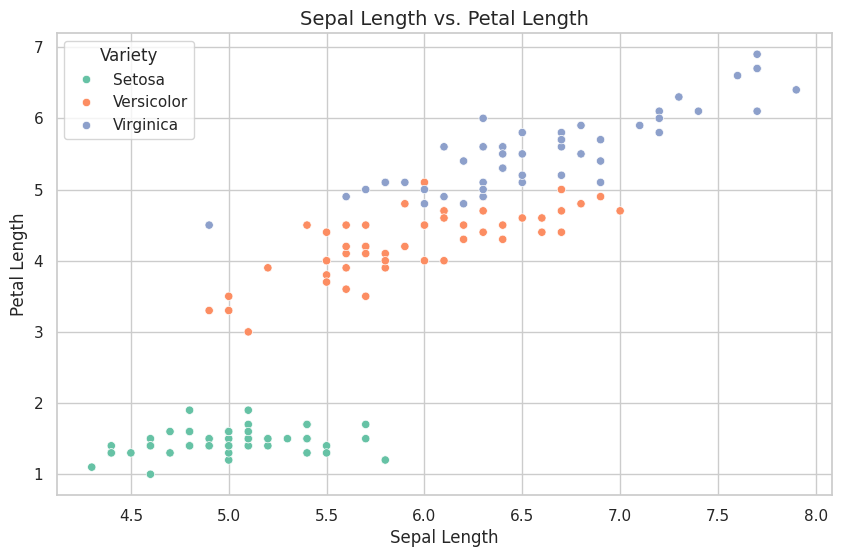

In [28]:
# Scatter plot of sepal length vs. petal length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal.length', y='petal.length', hue='variety', data=iris_cleaned, palette='Set2')

plt.title('Sepal Length vs. Petal Length', fontsize=14)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Petal Length', fontsize=12)
plt.legend(title='Variety')
plt.show()
